In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('cardata.csv')


In [3]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [5]:
df['No_of_Year']=2020-df['Year']

In [6]:
df.drop(['Year'],axis=1,inplace=True)
df.head(5)


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [7]:
df.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
No_of_Year       0
dtype: int64

In [8]:
print(df.Fuel_Type.unique())
print(df.Transmission.unique())
print(df.Seller_Type.unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
['Dealer' 'Individual']


In [9]:
final_dataset=df

In [10]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [11]:
final_dataset.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [12]:
import seaborn  as sns

In [13]:
new_corr=final_dataset.corr()
new_corr_index=new_corr.index
new_corr_index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_Year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

<AxesSubplot:>

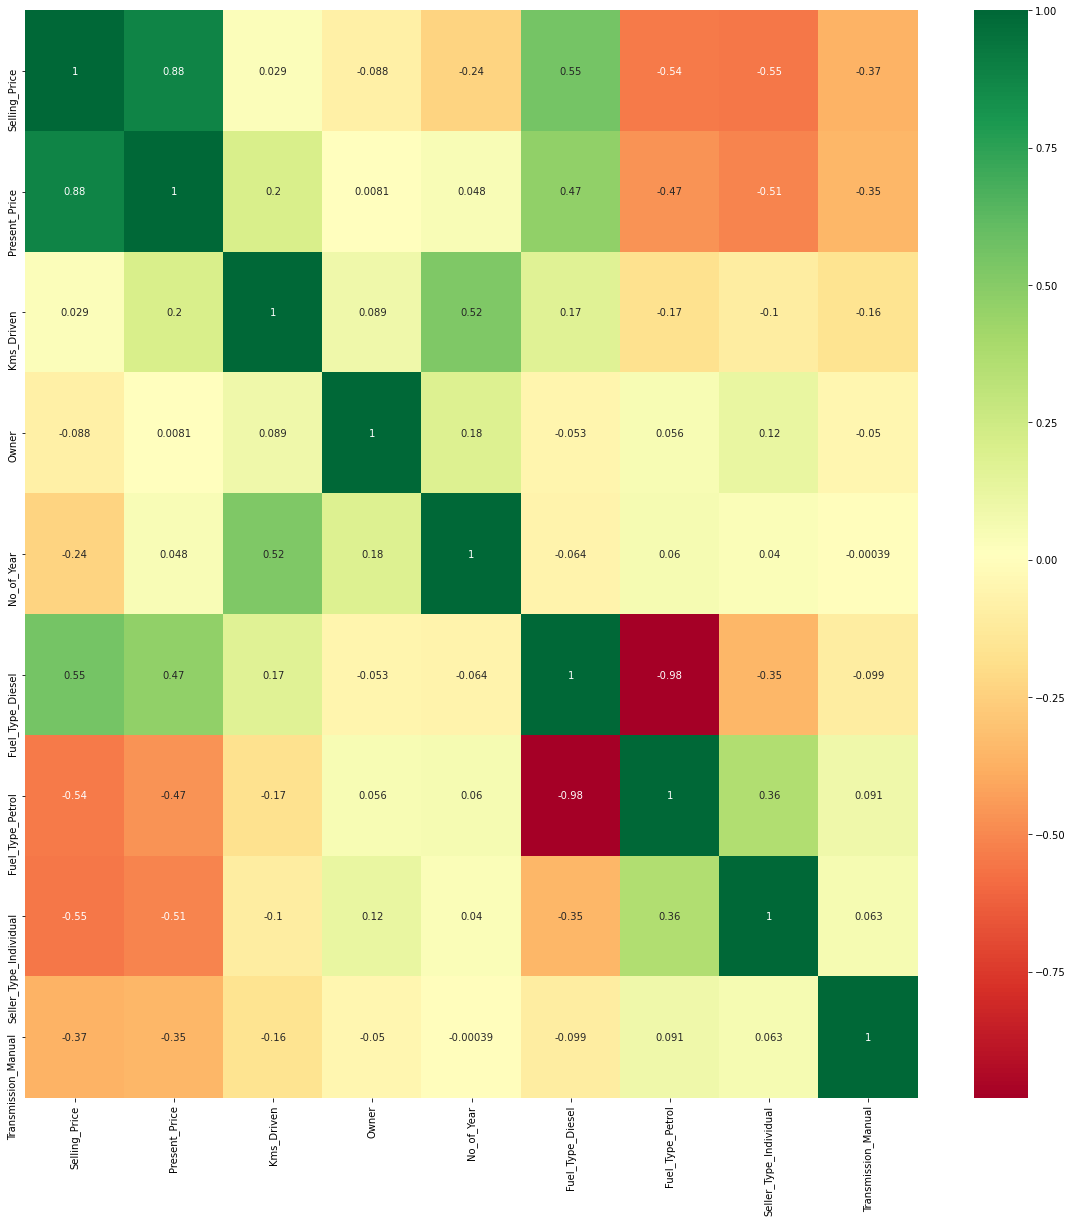

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(new_corr,annot=True,cmap='RdYlGn')

In [15]:
final_dataset.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [17]:
#We are Trying to get the importnant feature
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.33987365 0.04552494 0.0017363  0.07320427 0.24006257 0.01018893
 0.14012348 0.14928585]


In [19]:
important_feature=pd.Series(model.feature_importances_,index=X.columns)


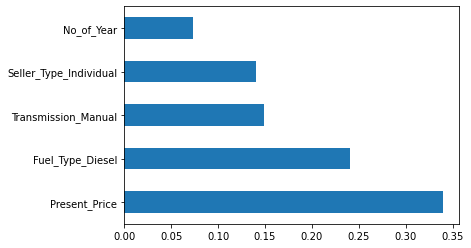

In [20]:
important_feature.nlargest(5).plot(kind='barh')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [23]:
import numpy as np

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
rcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,n_iter=10)

In [27]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [28]:
rcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [29]:
rcv.best_score_

0.8796324555907203

In [35]:
predictions=rcv.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [37]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))

0.760519785603743
2.7484292572657134


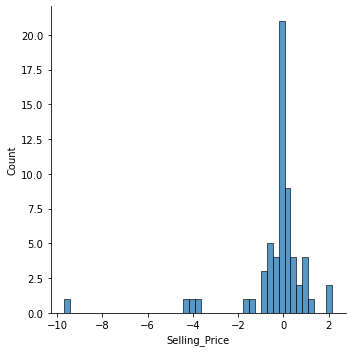

In [38]:
sns.displot(y_test-predictions)

In [39]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rcv,file)